# Cepstral Analysis, Smoothing and Synthesis

### References:
- https://en.wikipedia.org/wiki/Cepstrum
- https://ccrma.stanford.edu/~jos/sasp/Spectral_Envelope_Cepstral_Windowing.html


In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import Audio
import copy

In [3]:
sr = 44100. #Sampling rate
nyq = sr/2. #Nyquist Rate
T = 0.5 #Length in seconds
N = int(T*sr) #Num Samples
n = np.arange(N) #sample index
t = n/sr #time index [s]

# Calculation of Cepstrum
1. A signal is synthesized: a sine oscillator with overtones (via distortion) + white noise
2. The cepstrum is computed and plotted.

In [4]:
noise = (np.random.random(N)-0.5)*2.
f = 1001.5 #Hz
osc = np.tanh(np.sin(2*np.pi*t*f)*3)
x = osc+noise*0.01

In [5]:
Audio(data=x,rate=sr)

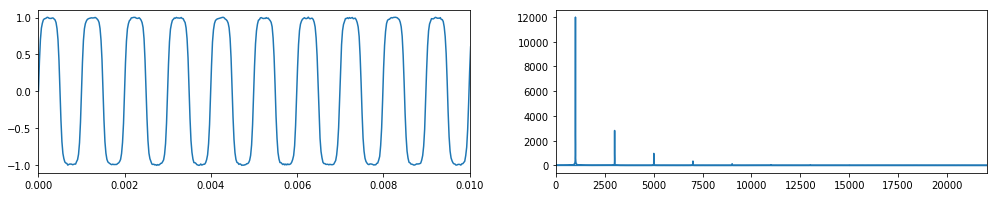

In [6]:
plt.figure(figsize=[17,3])
plt.subplot(121)
plt.plot(t,x)
plt.xlim([0,0.01])

plt.subplot(122)
faxis = np.fft.fftfreq(N,d=1/sr)
plt.plot(faxis,abs(np.fft.fft(x)))
plt.xlim([0,nyq])
plt.show()


plt.show()

## Cepstral Plot
The red line in the plot is positioned via the (known) fundamental frequency of the oscillator.
A peak in the cepstrum is expected at this point.

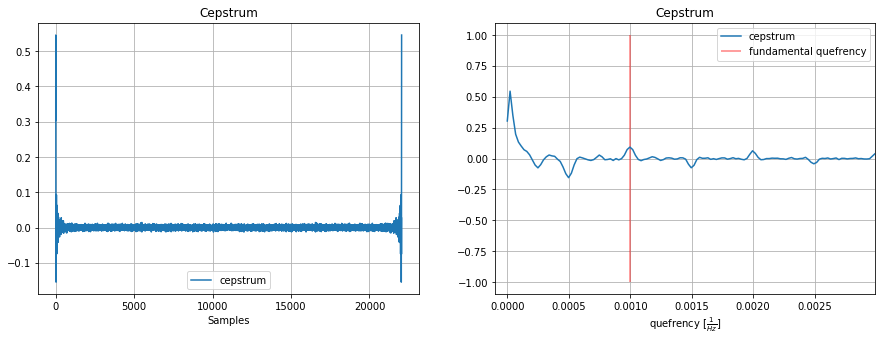

In [7]:
def cepstrumAnalysis(x,sr, comp=False):
    """
    https://de.mathworks.com/matlabcentral/fileexchange/44632-cepstral-analysis-with-matlab-implementation
     M.Sc. Eng. Hristo Zhivomirov  10/15/13
     
     
    
    """
    
    
    magSpec = abs(np.fft.fft(x))
    logSpec = np.log(magSpec)
    if not comp:
        NumUniquePts = np.ceil((len(x)+1)/2);
        cep = np.real(np.fft.ifft(logSpec))[0:int(NumUniquePts)]
        q = np.arange(NumUniquePts)/sr;
        return q,cep
    else:
        cep = (np.fft.ifft(logSpec))
        return cep

    
plt.figure(figsize=[15,5])
plt.subplot(121)

cep = cepstrumAnalysis(x,sr, comp=True)
plt.plot(np.real(cep), label='cepstrum')
plt.xlabel('Samples')
plt.title('Cepstrum')
plt.legend()
plt.grid()

plt.subplot(122)

q,cep = cepstrumAnalysis(x,sr)
plt.plot(q,cep, label='cepstrum')
plt.xlim([-0.0001,(1/f)*3])
plt.vlines(1/f,-1,1,'r',alpha=0.5, label='fundamental quefrency')
plt.xlabel(r'quefrency $[\frac{1}{Hz}]$')
plt.title('Cepstrum')
plt.legend()
plt.grid()

plt.show()

## Cepstral Smoothing

### Synthesize a more interesting signal
construct a filter that combines two combfilters and two arbitrary IIR filters to skew the spectrum. The combined impulse response is plotted below. 
#### Construct Filters

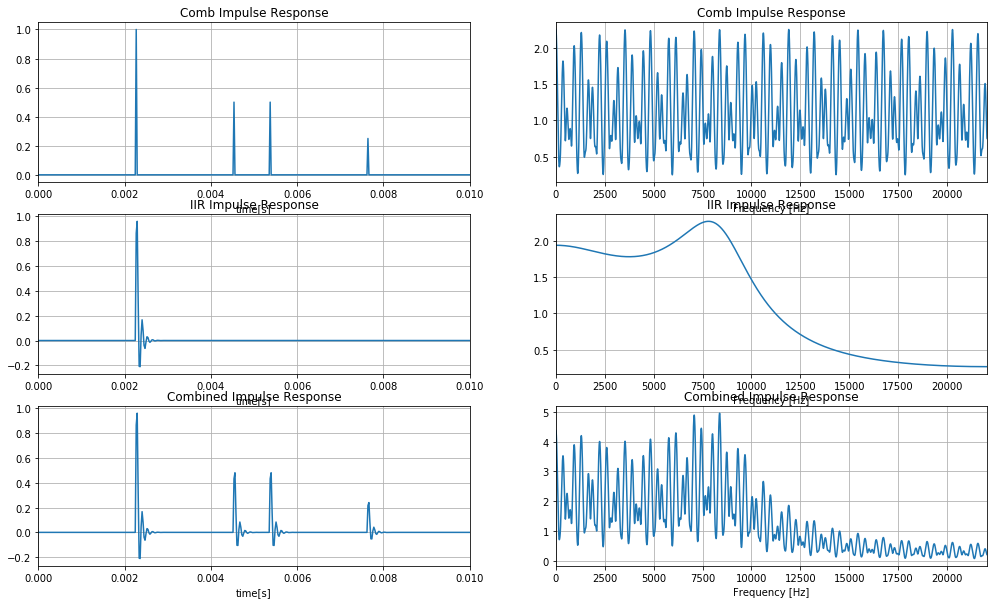

In [8]:
def ffcomb(x,m):
    xm = np.roll(x,m)
    xm[0:m]=0
    y = x+xm*0.5
    return y

imp = np.zeros_like(n)
imp[100]=1

combImp = ffcomb(imp,100)
combImp = ffcomb(combImp,137)

iirImp = sig.lfilter([1, 0.],[-0.9, 0.5],imp)
iirImp = sig.lfilter([0.70, 0., 0],[-0.9, 0.5, -0.5],iirImp)

combinedImp = sig.lfilter([1, 0.],[-0.9, 0.5],combImp)
combinedImp = sig.lfilter([0.70, 0., 0],[-0.9, 0.5, -0.5],combinedImp)



plt.figure(figsize=[17,10])

plt.subplot(321)
plt.plot(t,combImp)
plt.xlabel('time[s]')
plt.title('Comb Impulse Response')
plt.xlim([0,0.01])
plt.grid()

plt.subplot(322)
faxis = np.linspace(0,sr,N)
plt.plot(faxis,abs(np.fft.fft(combImp)))
plt.xlim([0,nyq])
plt.title('Comb Impulse Response')
plt.xlabel('Frequency [Hz]')
plt.grid()

plt.subplot(323)
plt.plot(t,iirImp)
plt.xlabel('time[s]')
plt.title('IIR Impulse Response')
plt.xlim([0,0.01])
plt.grid()

plt.subplot(324)
faxis = np.linspace(0,sr,N)
plt.plot(faxis,abs(np.fft.fft(iirImp)))
plt.xlim([0,nyq])
plt.title('IIR Impulse Response')
plt.grid()
plt.xlabel('Frequency [Hz]')

plt.subplot(325)
plt.plot(t,combinedImp)
plt.xlabel('time[s]')
plt.title('Combined Impulse Response')
plt.grid()
plt.xlim([0,0.01])

plt.subplot(326)
faxis = np.linspace(0,sr,N)
plt.plot(faxis,abs(np.fft.fft(combinedImp)))
plt.xlim([0,nyq])
plt.title('Combined Impulse Response')
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()


plt.show()

#### Filter some white noise

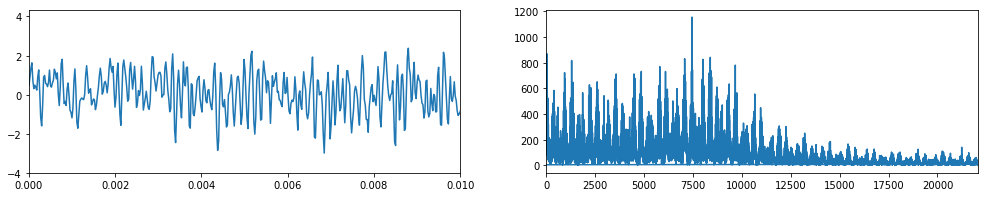

In [9]:
x = noise


x = ffcomb(x,100)
x = ffcomb(x,137)
x = sig.lfilter([1, 0.],[-0.9, 0.5],x)
x = sig.lfilter([0.70, 0., 0],[-0.9, 0.5, -0.5],x)


plt.figure(figsize=[17,3])
plt.subplot(121)
plt.plot(t,x)
plt.xlim([0,0.01])

plt.subplot(122)
faxis = np.fft.fftfreq(N,d=1/sr)
plt.plot(faxis,abs(np.fft.fft(x)))
plt.xlim([0,nyq])
plt.show()


plt.show()

### It should be possible via spectral smoothing to obtain the smooth frequency resonse of the system but without the combfilters:

In [10]:
def cepToSpec(cep):
    logSpec = np.fft.fft(cep)
    spec = np.exp(logSpec)
    return spec
    

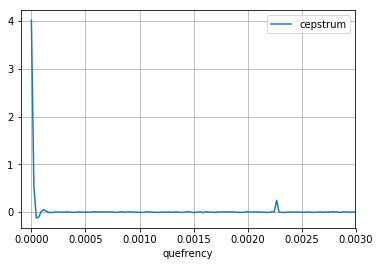

In [11]:
q,cep = cepstrumAnalysis(x,sr)
plt.plot(q,(cep), label='cepstrum')
plt.xlim([-0.0001,(1/f)*3])
plt.xlabel('quefrency')
plt.legend()
plt.grid()
plt.show()

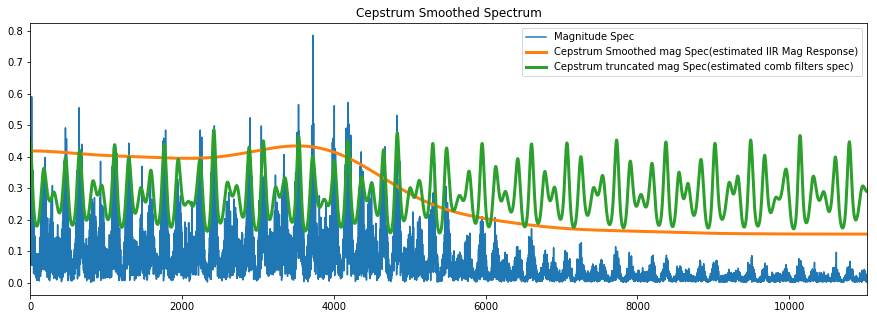

In [12]:
plt.figure(figsize=[15,5])
complexCep = cepstrumAnalysis(x, sr,comp=True)
fcep = copy.copy(complexCep)
combcep = complexCep
fcep[15:]=0
spec = cepToSpec(fcep)

combcep[1:50]=0
combcep[200:]=0

combSpec = cepToSpec(combcep)/10

plt.plot(abs(np.fft.fft(x))/(N/15), label='Magnitude Spec')
plt.plot(np.real(spec)/200, linewidth=3, label='Cepstrum Smoothed mag Spec(estimated IIR Mag Response)')
plt.plot(np.real(combSpec)/20, linewidth=3, label='Cepstrum truncated mag Spec(estimated comb filters spec)')

plt.xlim([0,int(N/2)])
plt.title("Cepstrum Smoothed Spectrum")
plt.legend()

plt.show()
    

## Cepstral Synthesis
By creating an arbitrary Cepstrum, transforming it to a spectrum and then to the time domain, one can create interesting Sounds.

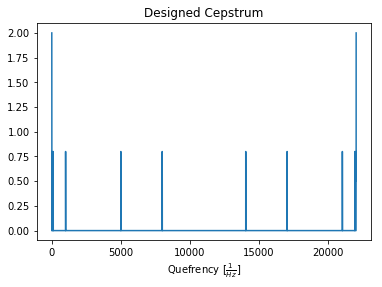

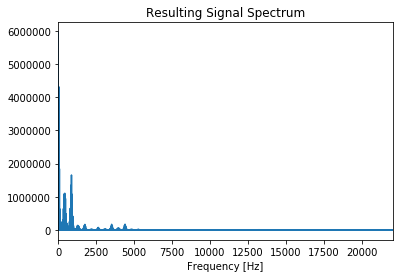

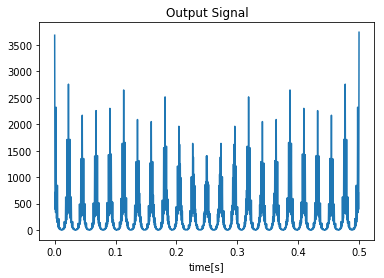

In [32]:
myCep = np.zeros(N)

myCep[0]= 2 # uninteresting value. Signal energy.
myCep[1]= 1 # interesting value. 1 sounds like lowpassed, -1 sounds like highpassed.
myCep[2]= 0.5
myCep[3]= 0.8
myCep[10]= 0.8
myCep[100]= 0.8
myCep[1000]= 0.8
myCep[5000]= 0.8
myCep[8000]= 0.8


myCep[int(N/2):]=myCep[int(N/2):0:-1] #Mirror cepstrum
myCep[N-1]= myCep[0]
plt.plot(myCep)
plt.title('Designed Cepstrum')
plt.xlabel(r'Quefrency $[\frac{1}{Hz}]$')
plt.show()

mspec = cepToSpec(myCep)
plt.plot(faxis,np.real(mspec))
plt.xlim([0,nyq])
plt.title('Resulting Signal Spectrum')
plt.xlabel('Frequency [Hz]')
plt.show()

mx = np.fft.ifft(mspec)
plt.plot(t, np.abs(mx))
plt.title('Output Signal')
plt.xlabel('time[s]')
plt.show()

Audio(data=np.real(mx), rate=sr)